<a href="https://colab.research.google.com/github/2714830587-xh/testgit2/blob/master/%E6%95%B0%E5%AD%97%E5%9B%BE%E5%83%8F%E4%BD%9C%E4%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

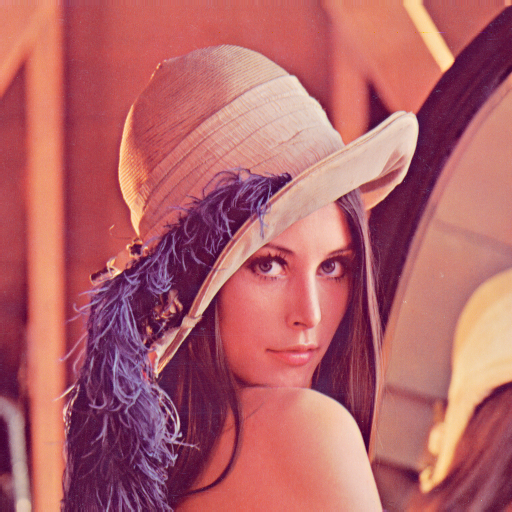

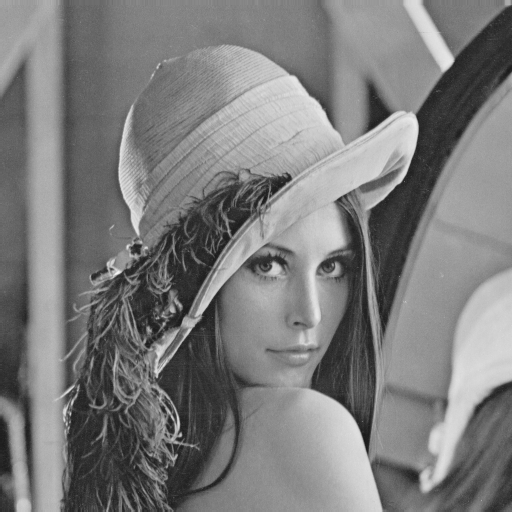

(262144,)


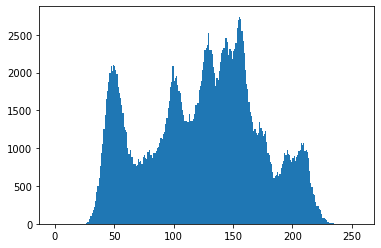

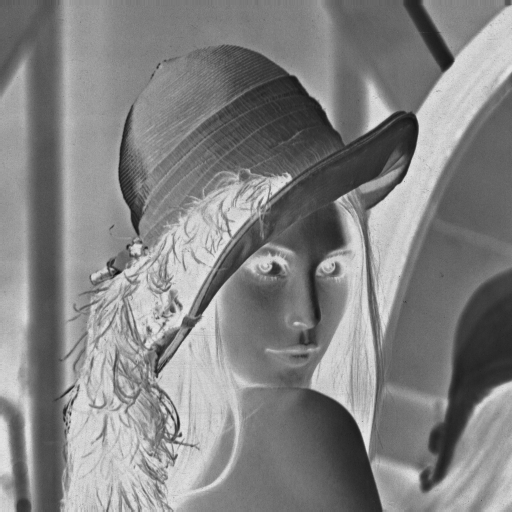

(262144,)


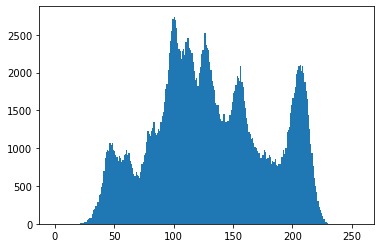

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

from google.colab.patches import cv2_imshow 

# 【读取图像】
img = cv2.imread('/content/sample_data/linda.png')
cv2_imshow(img)
# 【转换成灰度图】
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   # (300, 520)
cv2_imshow(img)

# print(type(img))    # <class 'numpy.ndarray'>


def plt_hist(img):
    # 【将图像像素数据平铺】
    print(img.ravel().shape)
    # 【绘制直方图】
    plt.hist(img.ravel(), 256, [0, 256])
    plt.show()


if __name__ == '__main__':
    plt_hist(img)
# 直方图均衡化
    im2 = 255 - img
    cv2_imshow(im2)
    plt_hist(im2)

https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html

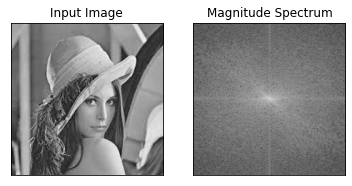

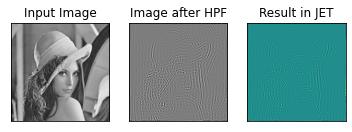

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/lena.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()




rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()


https://towardsdatascience.com/image-processing-with-python-application-of-fourier-transformation-5a8584dc175b

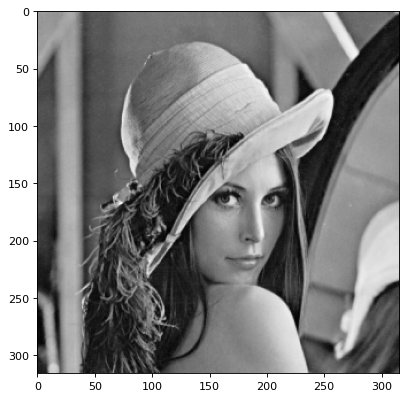

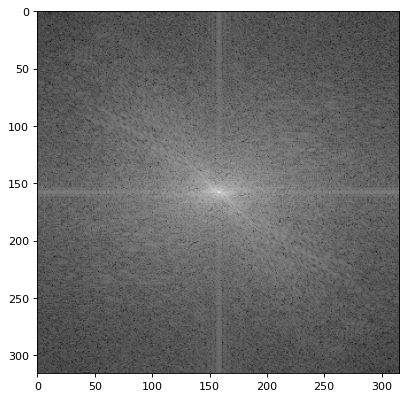

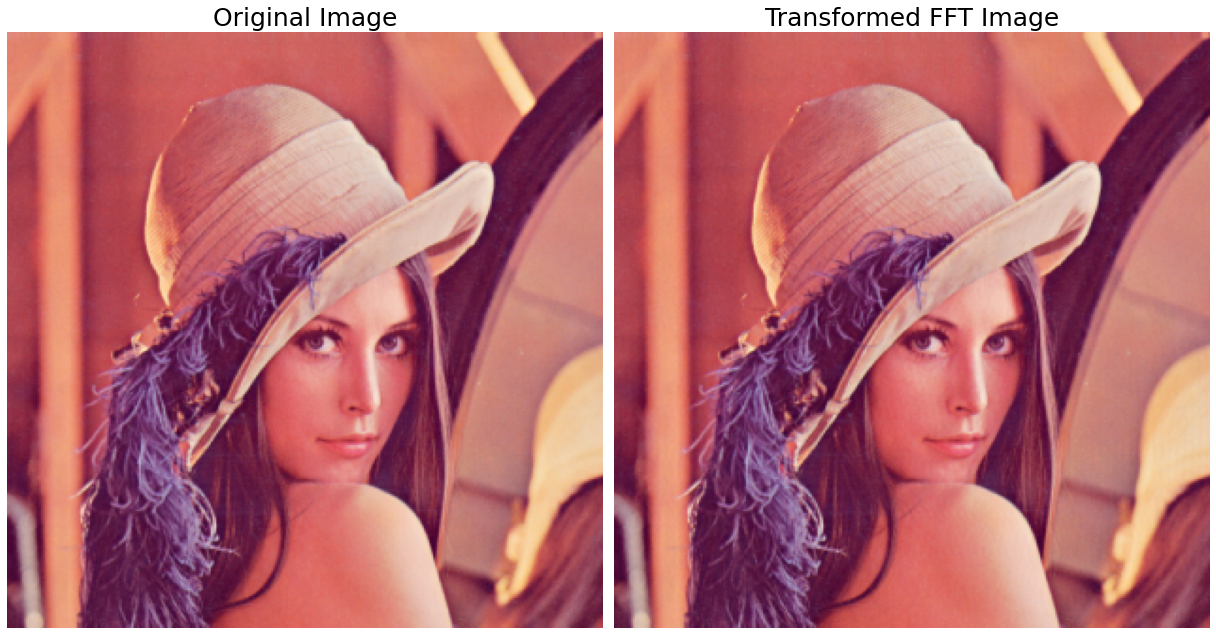

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
# 【读取图像】
dark_image = imread('/content/Lenna.jpg')

# 【转换成灰度图】
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray');

# 【傅里叶变换】
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

# 【原始图像颜色的同时进行傅里叶变换调整】
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed FFT Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()
fourier_transform_rgb(dark_image)